### This notebook produces Fig. 2

In [1]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
import time


# System size
L = 9

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

In [2]:
# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + Z.at(L)    + X.at(L) +X.at(1).dot(X.at(L))


Flow step  0  using H with norm  161.59207901379324
Found minimum norm =  111.23429471127456  for s =  0.03914062500000001
Flow step  1  using H with norm  161.59207901379298
Found minimum norm =  90.80159435103691  for s =  0.019921875
Flow step  2  using H with norm  161.59207901379327
Found minimum norm =  77.7012914583062  for s =  0.011015625
Flow step  3  using H with norm  161.59207901379327
Found minimum norm =  70.78639260303092  for s =  0.007109374999999999
Flow step  4  using H with norm  161.59207901379327
Found minimum norm =  67.5137895001443  for s =  0.0035156249999999997
Flow step  5  using H with norm  161.59207901379324
Found minimum norm =  65.97165404778285  for s =  0.0016406250000000002
Flow step  6  using H with norm  161.59207901379324
Found minimum norm =  64.39639586052722  for s =  0.019921875
Flow step  7  using H with norm  161.59207901379327
Found minimum norm =  56.092352503487774  for s =  0.0011718750000000002
Flow step  8  using H with norm  161.5920

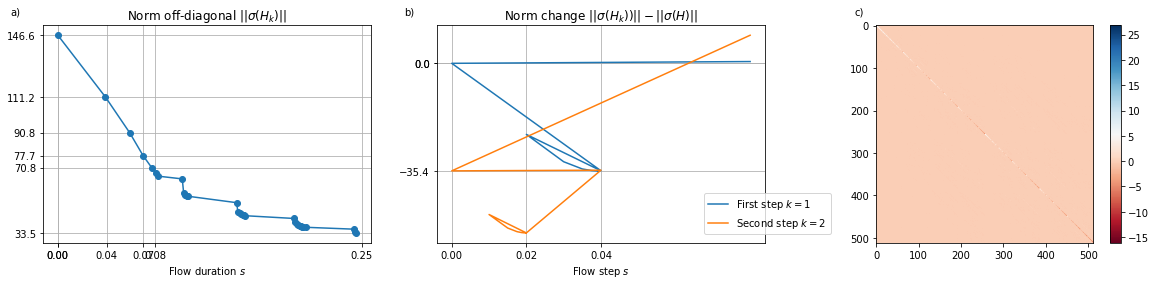

In [3]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TLFIM )

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.nmb_search_points_minimizing_s_search = 10
flow.flow_step_max = 0.08
flow.nmb_flow_steps = 30
flow.please_use_binary_search =  True
flow.please_compute_observables = False
flow.flow_forwards( )


flow.show_flow_forwards_results()

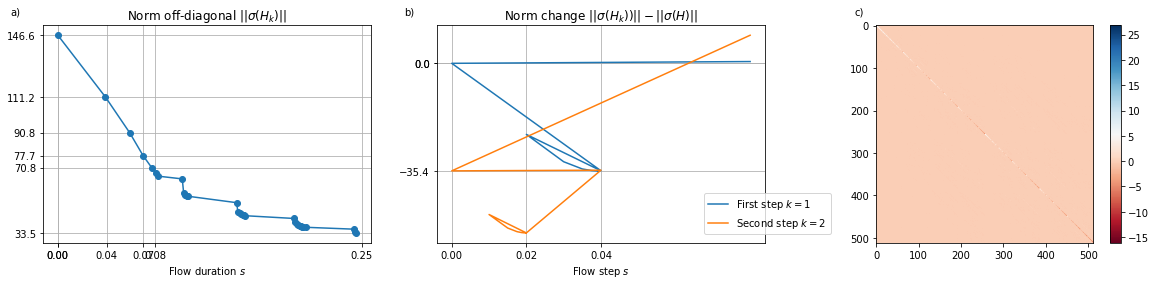

In [28]:
flow.show_flow_forwards_results(please_save_the_fig=True)

In [163]:
flow.flow_outputs.keys()

dict_keys(['flow_generator_type', 'minimal_norms_sigma_H', 'minimizing_flow_step', 'cumulative_flow_parameters', 'flow_steps_grids_binary_search', 'norms_flow_generator_W', 'flowed_hamiltonians', 'flowed_hamiltonian', 'config', 'norm_H_for_optimal_Z', 'norms_H_for_different_Z', 'all_norms_computed_in_search', 'all_Z_names', 'str_of_minimizer_Z', 'optimally_flowed_H', 'minimal_norm_sigma_H_s', 's_grid', 'norms_sigma_H_s', 'final_flowed_H'])

In [164]:
import plotly.graph_objs as go
import plotly.express as px
color_discrete_sequence=px.colors.qualitative.G10


x = [0]+ [ x + 1 for x in range( flow.nmb_flow_steps)]
x = [ sum(flow.flow_outputs['minimizing_flow_step'][:i]) for i in 
    range(1,1+len(flow.flow_outputs['minimizing_flow_step']))]

norms = flow.flow_outputs['minimal_norm_sigma_H_s']
fig_norm = px.line(x=x, y=norms,        markers=True)
fig_norm.update_yaxes(range=[min(norms)-5,max(norms)+6])

y_selection = [0,1,2,3,7,13,-1]
y_labels_rounded = [ round(y, 1 ) for y in norms ]
y_vals = [norms[i] for i in y_selection]
y_labels = [ y_labels_rounded[i] for i in y_selection]
x_selection = [0,1,3,7,13,-2]
x_vals = [x[i] for i in x_selection]
x_labels = [ round(x[i],2)for i in x_selection]


fig_norm.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig_norm.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig_norm.update_layout(margin=dict(l=20, r=0, b=0, t=16))
fig_norm.update_layout(
    autosize=False,
    width=400,
    height=300)
fig_norm.update_layout(
    xaxis=dict(
        title=r'$\text{Total flow duration } \ell$',
        titlefont=dict(
            family='Courier New, monospace',
            size=14
        ),
        tickmode = 'array',
        tickvals = x_vals,
        ticktext = x_labels
    ))
fig_norm.update_layout(
    yaxis = dict(
        title = '',
        tickmode = 'array',
        tickvals = y_vals,
        ticktext = y_labels
    )
)
fig_norm.add_annotation(x=-.13, y=1.061,
            text='a)',
            xref="paper",
    yref="paper",
            showarrow=False,font=dict(
            family='Courier New, monospace',
            size=14
        )
)
fig_norm.write_image( 'figs/'+hamiltonian_name+'_norm_decay_30_steps.pdf' )
fig_norm.show()

[7, 15, 20, 36, 40, 63, 65, 72, 80, 129, 130, 135, 258, 259, 260, 385, 448, 450, 480, 504] are the eigenstates selected with threshold = 0.6


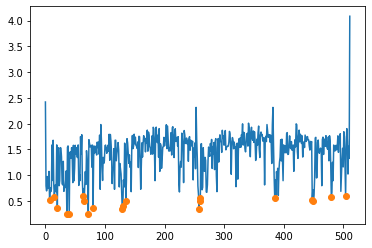

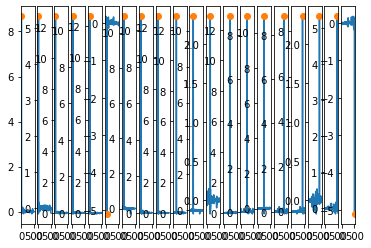

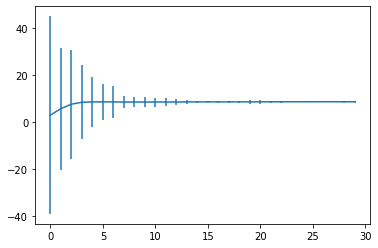

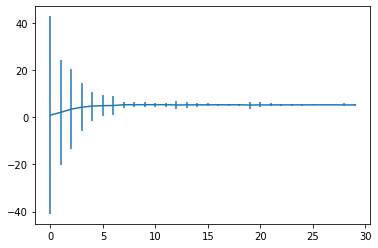

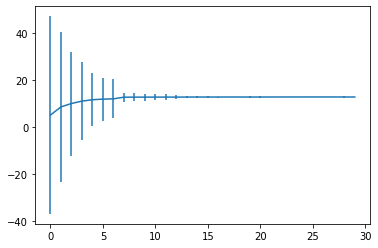

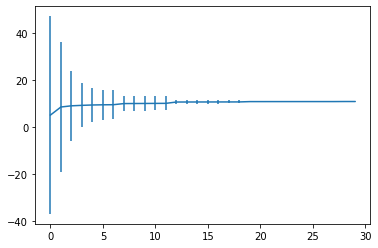

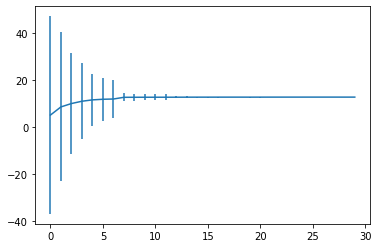

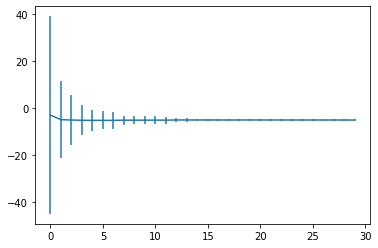

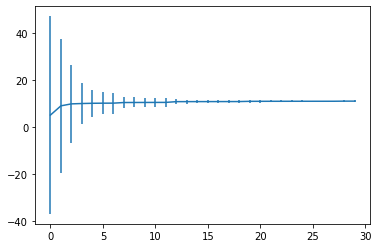

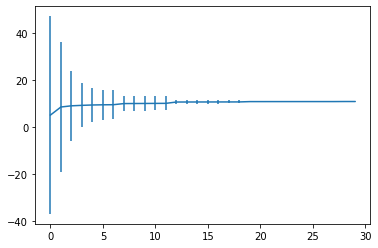

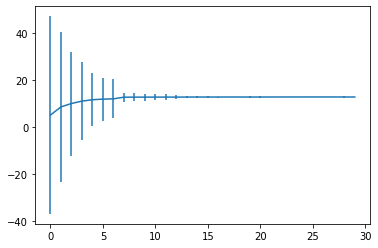

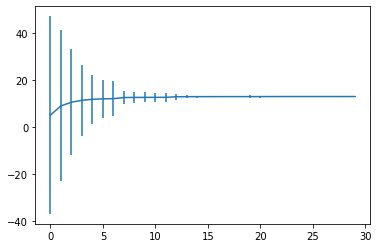

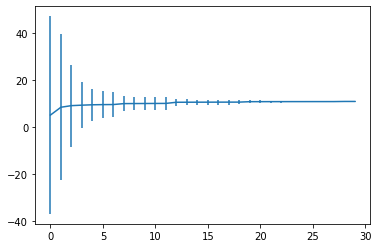

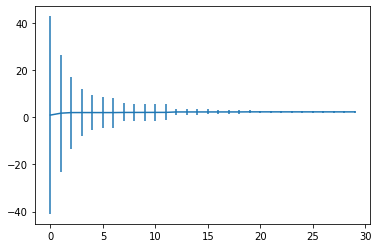

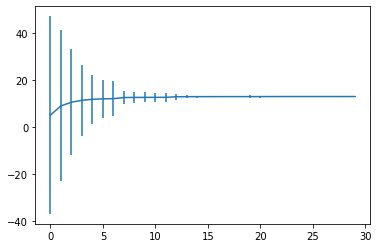

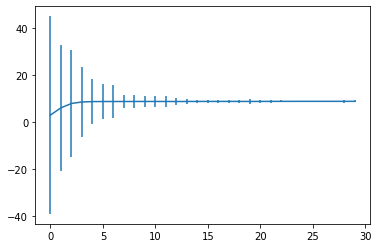

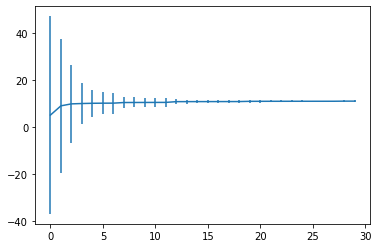

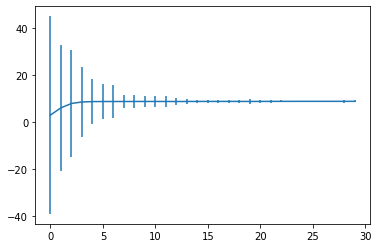

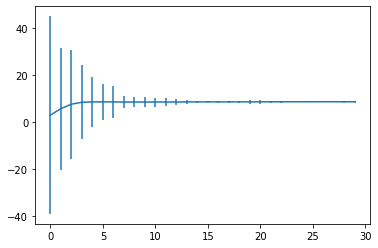

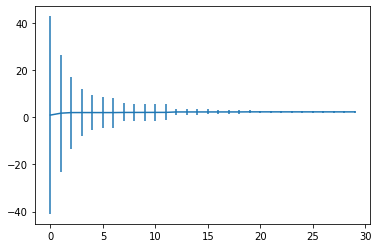

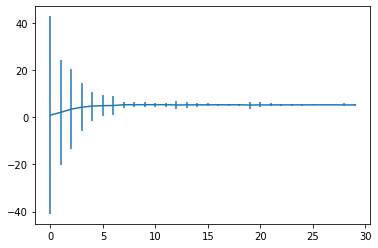

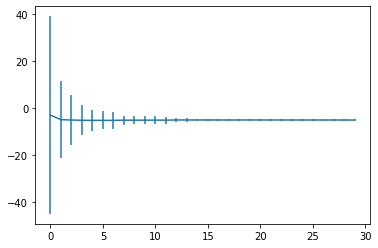

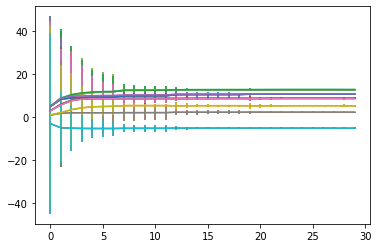

0 8.676407373046745 0.26153101041458626
1 5.327291024821981 0.3401501169234926
2 12.691113532485153 0.12769931647454769
3 10.764392060554995 0.0646688956846333
4 12.636293573749066 0.06206673130012064
5 -5.104558344990898 0.3494766287213551
6 10.928818452764475 0.24049819310612008
7 10.764392060554998 0.0646688956846333
8 12.691113532485286 0.12769931647488875
9 12.886964136292002 0.11458701879661248
10 10.798048405605345 0.1584835624375529
11 2.3588120691854058 0.2458705860320789
12 12.88696413629213 0.11458701879652722
13 8.853124097720688 0.31419270929390564
14 10.928818452764489 0.24049819310609166
15 8.853124097720633 0.3141927092939625
16 8.676407373046729 0.26153101041458626
17 2.358812069185417 0.24587058603207534
18 5.327291024821989 0.3401501169236312
19 -5.104558344990859 0.3494766287213835


In [165]:
H_flowed = flow.flow_outputs['optimally_flowed_H'][-1]
flow.please_be_visual  = True
selected_eigenestates = flow.select_decoupled_states_from_H(threshold=.6)
flow.show_selected_couplings( selected_couplings=selected_eigenestates,H_flowed= H_flowed)

#selected_eigenestates.append(0)
#selected_eigenestates.append(2**L-1)

energy = []
energy_fluctuation = []
for k in selected_eigenestates:
    state = np.array(np.eye(2**L).tolist()[k])
    energy_k = []
    energy_fluctuation_k = []    
    for n in range(flow.nmb_flow_steps):
        Hn = flow.flow_outputs['optimally_flowed_H'][n]
        energy_k.append(flow.compute_expected_energy( H = Hn, state = state))
        energy_fluctuation_k.append(flow.compute_expected_energy_fluctuation( 
                H = Hn, state = state, expected_energy = energy_k[-1]))
    energy.append( energy_k )
    energy_fluctuation.append(energy_fluctuation_k)

        

for k in range(len(selected_eigenestates)):
    plt.errorbar(range(flow.nmb_flow_steps),energy[k], yerr=energy_fluctuation[k])
    plt.show()

for k in range(len(selected_eigenestates)):
    plt.errorbar(range(flow.nmb_flow_steps),energy[k], yerr=energy_fluctuation[k])
plt.show()

energies = [ flow.compute_expected_energy( np.eye(2**L)[i,:], H=H_flowed) for i in selected_eigenestates ]
fluctuations = [ flow.compute_expected_energy_fluctuation( np.eye(2**L)[i,:], H=H_flowed) for i in selected_eigenestates ]

for i,e in enumerate(energies):
    print(i,e, fluctuations[i])

In [166]:
plt_selection=[19,17,16,3,4,9]

In [167]:
import plotly.graph_objs as go
import plotly.express as px
color_discrete_sequence=px.colors.qualitative.G10


x = [ x + 1 for x in range( flow.nmb_flow_steps)]

Scatter_list = []

for i, k in enumerate(plt_selection):

    e = energy[k]
    ef = energy_fluctuation[k]

    y = e
    y_upper = [ E+EF for E,EF in zip( e, ef)]
    y_lower = [ E-EF for E,EF in zip( e, ef)]
    state_name = r'$|'+str(flow.binary_label_from_state_number(selected_eigenestates[k])) +r'\rangle$'
    Scatter_list.append(
    go.Scatter(
        x=x,
        y=y,
        line=dict(color=color_discrete_sequence[i]),
        mode='lines',
        name= state_name

    ) )
    Scatter_list.append(
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor=color_discrete_sequence[i],
        line=dict(color='rgba(0,0,0,0)'),
            opacity=0.2,
        hoverinfo="skip",
        showlegend=False
    )   
    )

fig = go.Figure(
Scatter_list
)
fig.show()


ticks_txt = [str(round(energy[k][-1],2)) for k in plt_selection]
ticks_txt[-2] = ''
tickvals = [round(energy[k][-1],2) for k in plt_selection]
tickvals.append(0)
ticks_txt.append(str(0))
fig.update_yaxes(range=[-5.7, 14.3])
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = tickvals,
        ticktext = ticks_txt
    )
)


annotations = []
y_shifts = [10,10,-10,-8,-7,10]

for i, k in enumerate(plt_selection):
    state_name = r'$|'+str(flow.binary_label_from_state_number(selected_eigenestates[k])) +r'\rangle$'

    fig.add_annotation(x=26, y=energies[k],
            text=state_name,
            xref="x",
    yref="y",
            showarrow=False,
                      yshift = y_shifts[i])

fig.update_layout(
    showlegend=False
)

fig.add_annotation(x=-.13, y=1.061,
            text='c)',
            xref="paper",
    yref="paper",
            showarrow=False,font=dict(
            family='Courier New, monospace',
            size=14
        )
)

fig.update_layout(
    xaxis=dict(
        title=dict( text = r'$\text{Flow step } k$', standoff = 6),
        titlefont=dict(
            family='Courier New, monospace',
            size=14
        )
    ))

fig.update_layout(
    title={
        'text': r'$\text{Expected energy value } E^{(k)}_\mu$',
        'y':.945,
        'x':0.54})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(margin=dict(l=46, r=0, b=0, t=25))
fig.update_layout(
    autosize=False,
    width=400,
    height=300)
fig.write_image( 'figs/'+hamiltonian_name+'_eigenstates_selection_30_steps.pdf' )
fig.show()

[2, 15, 128, 480] are the eigenstates selected with threshold = 1


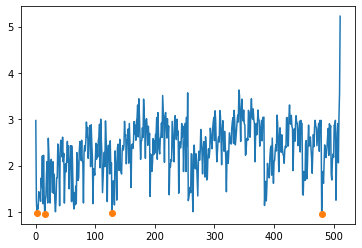

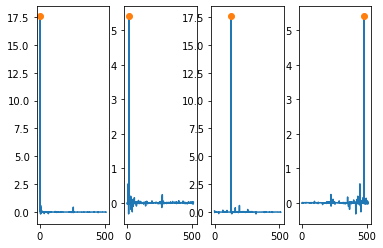

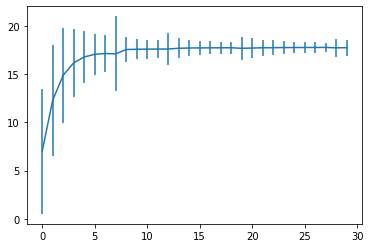

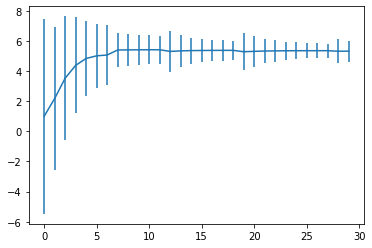

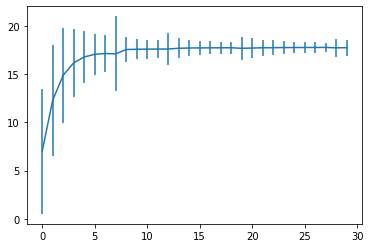

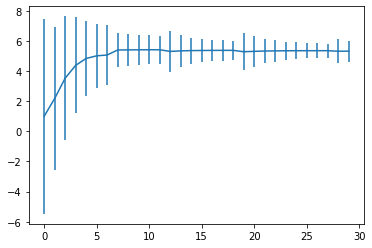

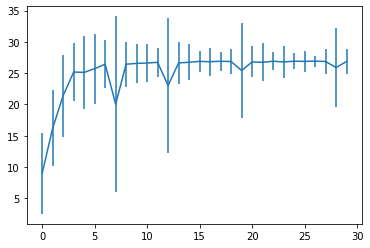

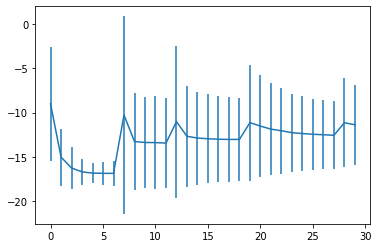

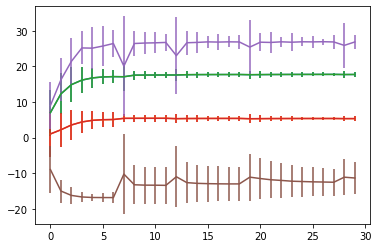

0 17.735785573213974 0.26153101041458626
1 5.327291024821981 0.3401501169234926
2 17.735785573213885 0.12769931647454769
3 5.327291024821989 0.0646688956846333
4 26.813433528636388 0.06206673130012064
5 -11.603433478648638 0.3494766287213551


In [168]:
H_flowed2 = flow.flow_outputs['optimally_flowed_H'][10]
flow.please_be_visual  = True
selected_eigenestates2 = flow.select_decoupled_states_from_H(H_flowed=H_flowed2, threshold=1)
flow.show_selected_couplings( selected_couplings=selected_eigenestates2,H_flowed= H_flowed2)

selected_eigenestates2.append(0)
selected_eigenestates2.append(2**L-1)

energy = []
energy_fluctuation = []
for k in selected_eigenestates2:
    state = np.array(np.eye(2**L).tolist()[k])
    energy_k = []
    energy_fluctuation_k = []    
    for n in range(flow.nmb_flow_steps):
        Hn = flow.flow_outputs['optimally_flowed_H'][n]
        energy_k.append(flow.compute_expected_energy( H = Hn, state = state))
        energy_fluctuation_k.append( np.sqrt(flow.compute_expected_energy_fluctuation( 
                H = Hn, state = state, expected_energy = energy_k[-1])))
    energy.append( energy_k )
    energy_fluctuation.append(energy_fluctuation_k)

        

for k in range(len(selected_eigenestates2)):
    plt.errorbar(range(flow.nmb_flow_steps),energy[k], yerr=energy_fluctuation[k])
    plt.show()

for k in range(len(selected_eigenestates2)):
    plt.errorbar(range(flow.nmb_flow_steps),energy[k], yerr=energy_fluctuation[k])
plt.show()

energies = [ flow.compute_expected_energy( np.eye(2**L)[i,:], H=H_flowed) 
            for i in selected_eigenestates2 ]
fluctuations = [ flow.compute_expected_energy_fluctuation( np.eye(2**L)[i,:], H=H_flowed) for i in selected_eigenestates ]

for i,e in enumerate(energies):
    print(i,e, fluctuations[i])

In [169]:
plt_selection=[4,0,1,5]

In [170]:
import plotly.graph_objs as go
import plotly.express as px
color_discrete_sequence=px.colors.qualitative.G10


x = [ x + 1 for x in range( flow.nmb_flow_steps)]

Scatter_list = []

for i, k in enumerate(plt_selection):

    e = energy[k]
    ef = energy_fluctuation[k]

    y = e
    y_upper = [ E+EF for E,EF in zip( e, ef)]
    y_lower = [ E-EF for E,EF in zip( e, ef)]
    state_name = r'$|'+str(flow.binary_label_from_state_number(selected_eigenestates2[k])) +r'\rangle$'
    Scatter_list.append(
    go.Scatter(
        x=x,
        y=y,
        line=dict(color=color_discrete_sequence[i]),
        mode='lines',
        name= state_name

    ) )
    Scatter_list.append(
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor=color_discrete_sequence[i],
        line=dict(color='rgba(0,0,0,0)'),
            opacity=0.2,
        hoverinfo="skip",
        showlegend=False
    )   
    )

fig2 = go.Figure(
Scatter_list
)
fig2.show()


ticks_txt = [str(round(energy[k][-1],2)) for k in plt_selection]
tickvals = [round(energy[k][-1],2) for k in plt_selection]
tickvals.append(0)
ticks_txt.append(str(0))
# ticks_txt[] = ''
fig2.update_yaxes(range=[-21.7, 33.3])
fig2.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = tickvals,
        ticktext = ticks_txt
    )
)


annotations = []
y_shifts = [-10,-10,-10,-10,-7,10]

for i, k in enumerate(plt_selection):
    state_name = r'$|'+str(flow.binary_label_from_state_number(selected_eigenestates2[k])) +r'\rangle$'

    fig2.add_annotation(x=25, y=energies[k],
            text=state_name,
            xref="x",
    yref="y",
            showarrow=False,
                      yshift = y_shifts[i])

fig2.update_layout(
    showlegend=False
)




fig2.update_layout(
    xaxis=dict(
        title=dict(text = r'$\text{Flow step } k$', standoff = 6),
        titlefont=dict(
            family='Courier New, monospace',
            size=14
        )
    ))

fig2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig2.update_layout(margin=dict(l=46, r=0, b=0, t=25))
fig2.add_annotation(x=-.13, y=1.085,
            text='b)',
            xref="paper",
    yref="paper",
            showarrow=False,font=dict(
            family='Courier New, monospace',
            size=14
        )
)
fig2.update_layout(
    autosize=False,
    width=400,
    height=300,)
fig2.update_layout(
    title={
        'text': r'$\text{Expected energy value } E^{(k)}_\mu$',
        'y':.945,
        'x':0.54})
fig2.write_image( 'figs/'+hamiltonian_name+'_eigenstates_selection_10_steps.pdf' )
fig2.show()

In [171]:
#Inset

In [172]:
import plotly.graph_objs as go
import plotly.express as px
color_discrete_sequence=px.colors.qualitative.G10


x = [0]+ [ x + 1 for x in range( flow.nmb_flow_steps)]
x = [ sum(flow.flow_outputs['minimizing_flow_step'][:i]) for i in 
    range(1,1+len(flow.flow_outputs['minimizing_flow_step']))]

norms = flow.flow_outputs['minimal_norm_sigma_H_s']
fig = px.line(x=x, y=norms,        markers=True)
fig_norm.update_yaxes(range=[min(norms)-5,max(norms)+6])

y_selection = [0,1,2,3,7,13,-1]
y_labels_rounded = [ round(y, 1 ) for y in norms ]
y_vals = [norms[i] for i in y_selection]
y_labels = [ y_labels_rounded[i] for i in y_selection]
x_selection = [0,1,3,7,13,-2]
x_vals = [x[i] for i in x_selection]
x_labels = [ round(x[i],2)for i in x_selection]


fig_norm.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig_norm.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig_norm.update_layout(
    xaxis=dict(
        title=r'$\text{Total flow duration } \ell$',
        titlefont=dict(
            family='Courier New, monospace',
            size=14
        ),
        tickmode = 'array',
        tickvals = x_vals,
        ticktext = x_labels
    ))
fig_norm.update_layout(
    yaxis = dict(
        title = '',
        tickmode = 'array',
        tickvals = y_vals,
        ticktext = y_labels
    )
)
fig_norm.add_annotation(x=-.13, y=1.061,
            text='a)',
            xref="paper",
    yref="paper",
            showarrow=False,font=dict(
            family='Courier New, monospace',
            size=14
        )
)
fig_norm.update_layout(
    title={
        'text': r'$\text{Norm off-diagonal } \|\sigma(\hat{H}_k)\|_\text{HS}$',
        'y':.96,
        'x':0.5})
fig_norm.update_layout(margin=dict(l=20, r=0, b=0, t=13))
fig_norm.update_layout(
    autosize=False,
    width=400,
    height=300)
fig_norm.write_image( 'figs/'+hamiltonian_name+'_norm_decay_30_steps.pdf' )
fig_norm.show()

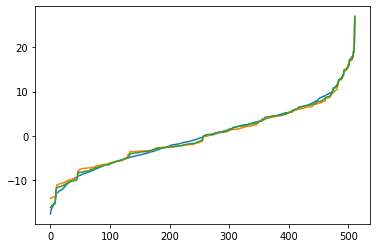

In [173]:
diagonal_spectrum2 = H_flowed.diagonal().tolist()
diagonal_spectrum = H_flowed2.diagonal().tolist()
e,U = np.linalg.eigh(H_flowed)

plt.plot(np.sort(e))
plt.plot(np.sort(diagonal_spectrum))
plt.plot(np.sort(diagonal_spectrum2))


In [174]:
import plotly.graph_objs as go
import plotly.express as px
color_discrete_sequence=px.colors.qualitative.G10


x = [0]+ [ x + 1 for x in range( flow.nmb_flow_steps)]
x = [ sum(flow.flow_outputs['minimizing_flow_step'][:i]) for i in 
    range(1,1+len(flow.flow_outputs['minimizing_flow_step']))]

norms = flow.flow_outputs['minimal_norm_sigma_H_s']
trace1 = go.Scatter(
    x=x,
    y=norms,
    mode = 'lines+markers',
        showlegend=False
)
 
trace2 = go.Scatter(
    x=[x+1 for x in range(2**L)],
    y=np.sort(e),
    xaxis='x2',            opacity=0.7,
name = r'$\text{Spectrum }E_\mu$',

    yaxis='y2',mode = 'lines'
)
trace3 = go.Scatter(
    x=[x+1 for x in range(2**L)],
    y=np.sort(diagonal_spectrum),
    xaxis='x2',
    yaxis='y2',    name = r'$\Delta(\hat H_{10})$'

)
trace4 = go.Scatter(
    x=[x+1 for x in range(2**L)],
    y=np.sort(diagonal_spectrum2),
    xaxis='x2',
    yaxis='y2',    name = r'$\Delta(\hat H_{30})$'

)
data = [trace1, trace2,trace3,trace4]
domain=[0.45, 0.97]

layout = go.Layout(
    xaxis2=dict(
        domain=domain,
        anchor='y2',
        title=dict(text=r'$\text{Eigenstate } \mu$',standoff=0),
        titlefont=dict(
            family='Courier New, monospace',
            size=11, 
        ),
        tickmode = 'array',
        tickvals = [1,124,256,124+256,512],
        ticktext = [1,124,256,124+256,512]
    ),
    yaxis2=dict(
        domain=domain,
        anchor='x2',
        tickmode = 'array',
        tickvals = [0,min(e),min(e)/2,max(e),max(e)/2],
        ticktext = [round(t,2) for t in [0,min(e),min(e)/2,max(e),max(e)/2]]
    ),
        xaxis3=dict(
        domain=domain,
        anchor='y2'
    ),
    yaxis3=dict(
        domain=domain,
        anchor='x2'
    ),
        xaxis4=dict(
        domain=domain,
        anchor='y2'
    ),
    yaxis4=dict(
        domain=domain,
        anchor='x2'
    )
)
fig_norm = go.Figure(data=data, layout=layout)


#fig_norm.update_yaxes(range=[min(norms)-5,max(norms)+6])

y_selection = [0,1,2,3,7,13,-1]
y_labels_rounded = [ round(y, 1 ) for y in norms ]
y_vals = [norms[i] for i in y_selection]
y_labels = [ y_labels_rounded[i] for i in y_selection]
x_selection = [0,1,3,7,13,-2]
x_vals = [x[i] for i in x_selection]
x_labels = [ round(x[i],2)for i in x_selection]


fig_norm.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig_norm.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig_norm.update_layout(margin=dict(l=20, r=0, b=0, t=25))
fig_norm.update_layout(
    autosize=False,
    width=400,
    height=300)
fig_norm.update_layout(
    xaxis=dict(
        title=dict(text=r'$\text{Total flow duration } \ell$', standoff=6),
        titlefont=dict(
            family='Courier New, monospace',
            size=14
        ),
        tickmode = 'array',
        tickvals = x_vals,
        ticktext = x_labels
    ))
fig_norm.update_layout(
    yaxis = dict(
        title = '',
        tickmode = 'array',
        tickvals = y_vals,
        ticktext = y_labels
    )
)
fig_norm.add_annotation(x=-.15, y=1.075,
            text='a)',
            xref="paper",
    yref="paper",
            showarrow=False,font=dict(
            family='Courier New, monospace',
            size=14
        )
)
fig_norm.update_layout(
    title={
        'text': r'$\text{Norm off-diagonal } \|\sigma(\hat{H}_k)\|_\text{HS}$',
        'y':.95,
        'x':0.54})
fig_norm.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.51,
        bgcolor = 'rgba(0,0,0,0)'
))
#iplot(fig_norm, filename='simple-inset')

In [175]:
fig_norm.write_image( 'figs/'+hamiltonian_name+'_norm_decay_30_steps.pdf' )